In [2]:
import pandas as pd
import numpy as np
import statistics
%matplotlib inline

In [3]:
df = pd.read_csv('Downloads/MyLA311_Service_Request_Data_2019.csv')

In [4]:
df.CreatedDate.dtype

dtype('O')

In [5]:
df['month']=df['CreatedDate'].astype(str).str[1]

In [6]:
year2019_column1=pd.DataFrame(df['month'])
year2019_column2=pd.DataFrame(df[df.columns[7]])
year2019=year2019_column1.join(year2019_column2)

In [7]:
change_month_dtype = pd.DataFrame(year2019.month.astype(int))
year2019 = change_month_dtype.join(year2019_column2)
year2019

,month,RequestSource
0,6,Mobile App
1,6,Mobile App
2,6,Call
3,6,Mobile App
4,6,Mobile App
5,6,Call
6,6,Self Service
7,6,Mobile App
8,6,Self Service
9,6,Call


In [8]:
data1=year2019['RequestSource'].value_counts()
data1

Call                             281667
Mobile App                       140592
Driver Self Report                81065
Self Service                      77509
Email                              2575
Council's Office                    397
Voicemail                           157
Twitter                              53
Walk-in                              51
Fax                                  24
Mayor's Office                       14
Web Form                              9
Queue Initiated Customer Call         1
Radio                                 1
Letter                                1
Name: RequestSource, dtype: int64

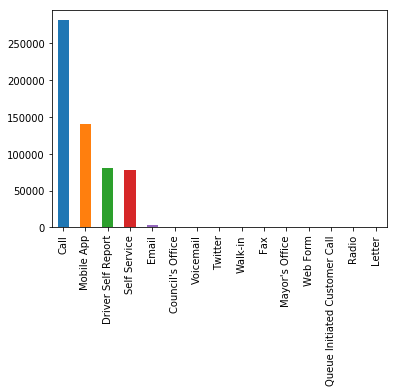

In [9]:
data1.plot(kind='bar')

In [10]:
#still more people are using 311 hotline compared to other request sources.  Lets found out if at least it has been going donwn over time.

In [11]:
table=pd.DataFrame(year2019.groupby(['month'])['RequestSource'].count())
table

,RequestSource
month,
1,96208
2,79533
3,93086
4,117012
5,105119
6,93158


In [12]:
table1=pd.DataFrame(year2019.groupby(['month'])['RequestSource'].value_counts())
table1

RequestSource
month RequestSource                               
1     Call                                   45634
      Mobile App                             23593
      Self Service                           13965
      Driver Self Report                     12489
      Email                                    373
      Council's Office                          97
      Voicemail                                 29
      Walk-in                                   12
      Fax                                        8
      Twitter                                    8
2     Call                                   38772
      Mobile App                             19955
      Self Service                           10554
      Driver Self Report                      9668
      Email                                    487
      Council's Office                          55
      Voicemail                                 16
      Walk-in                                    9
      Fax                                        6
      Twitter                                    6
      Mayor's Office                             4
      Radio                                      1
3     Call                                   46382
      Mobile App                             23272
      Self Service                           12232
      Driver Self Report                     10705
      Email                                    366
      Council's Office                          78
      Voicemail                                 33
      Twitter                                    9
...                                            ...
4     Twitter                                   11
      Walk-in                                    8
      Fax                                        7
      Letter                                     1
      Mayor's Office                             1
      Queue Initiated Customer Call              1
      Web Form                                   1
5     Call                                   50338
      Mobile App                             25468
      Self Service                           14504
      Driver Self Report                     14276
      Email                                    394
      Council's Office                          75
      Voicemail                                 31
      Walk-in                                   16
      Twitter                                    8
      Mayor's Office                             5
      Web Form                                   3
      Fax                                        1
6     Call                                   45491
      Mobile App                             23261
      Self Service                           12077
      Driver Self Report                     12007
      Email                                    244
      Council's Office                          43
      Voicemail                                 16
      Twitter                                   11
      Web Form                                   5
      Walk-in                                    2
      Mayor's Office                             1

[70 rows x 1 columns]

In [13]:
d={'month':[1,2,3,4,5], 'calls':[45634, 38772, 46382, 55050, 50338], 'mobile app':[23593, 19955, 23272, 25043, 25468], 'twitter':[8, 6, 9,11, 8], 'total requests':[96208, 79533, 93086, 117012, 105119]}
df2=pd.DataFrame(data=d)
df2

,month,calls,mobile app,twitter,total requests
0,1,45634,23593,8,96208
1,2,38772,19955,6,79533
2,3,46382,23272,9,93086
3,4,55050,25043,11,117012
4,5,50338,25468,8,105119


In [14]:
df2['other']=df2['total requests'] - (df2['calls'] + df2['mobile app'] + df2['twitter'])
df2['monthly call volume'] = df2['calls']/df2['total requests']
df2['monthly mobile app volume'] = df2['mobile app']/df2['total requests']
df2['monthly twitter volume'] = df2['twitter']/df2['total requests']
df2['monthly other source volume'] = df2['other']/df2['total requests']
df2=df2[['month', 'calls','mobile app','twitter','other','total requests', 'monthly call volume', 'monthly mobile app volume','monthly twitter volume', 'monthly other source volume']]
df2

,month,calls,mobile app,twitter,other,total requests,monthly call volume,monthly mobile app volume,monthly twitter volume,monthly other source volume
0,1,45634,23593,8,26973,96208,0.474326,0.245229,0.000083,0.280361
1,2,38772,19955,6,20800,79533,0.487496,0.250902,0.000075,0.261527
2,3,46382,23272,9,23423,93086,0.498270,0.250005,0.000097,0.251628
3,4,55050,25043,11,36908,117012,0.470465,0.214021,0.000094,0.315421
4,5,50338,25468,8,29305,105119,0.478867,0.242278,0.000076,0.278779


In [15]:
import matplotlib.pyplot as plt

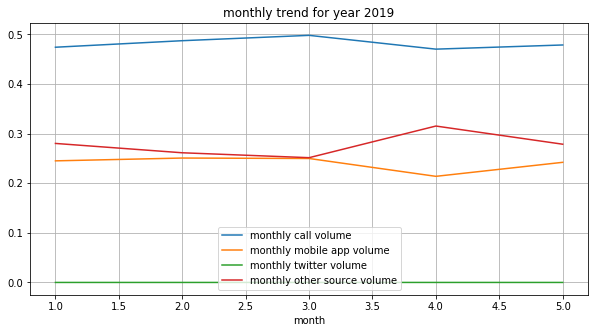

In [16]:
df2.plot(x='month', y=['monthly call volume', 'monthly mobile app volume', 'monthly twitter volume', 'monthly other source volume'], figsize=(10,5), grid=True)
plt.title('monthly trend for year 2019')
plt.show()

In [17]:
#use of twitter: almost none and it's not getting better.
#during the month of March, decrease in use of both phone calls and mobile app.  Increase in use of other reporting
#sources.  Not sure what happened during that month: app temporarily disabled?? longer hold time??

In [18]:
#is there a change in Y over time?  Line of best fit to check the significance and direction of change in Y over time. 